In [26]:
def text(a):
    row = [td.find('span', class_='text').text.strip().replace(',', '') for td in a]
    return row

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# url = "https://in.investing.com/indices/bank-nifty-historical-data?interval_sec=monthly"

# # Set the headers to mimic a browser request
# headers = {
#     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
#     'Referer': 'https://in.investing.com'
# }

# # Send a GET request to the URL
# response = requests.get(url, headers=headers)

# # Parse the HTML content
# soup = BeautifulSoup(response.content, 'html.parser')

# # Find the header text
# # header_text = soup.find_all('div', class_='th-wrapper')

# div_elements = soup.find_all('div', class_='th-wrapper')

# # Extract text from the span elements within the div elements
# header_text = [div.find('span', class_='text').text.strip() for div in div_elements][:7]


# # Find the table rows containing the desired data1
# row_0 = text(soup.find_all('td', class_='col-rowDate'))
# row_1 = text(soup.find_all('td', class_='col-last_close'))
# row_2 = text(soup.find_all('td', class_='col-last_open'))
# row_3 = text(soup.find_all('td', class_='col-last_max'))
# row_4 = text(soup.find_all('td', class_='col-last_min'))
# row_5 = text(soup.find_all('td', class_='col-volume'))[:24]
# row_6 = text(soup.find_all('td', class_='col-change_percent'))


# #Preparing DataFrame
# d = {header_text[0]: row_0, header_text[1]: row_1, header_text[2]: row_2, header_text[3]: row_3, header_text[4]: row_4 ,header_text[5]: row_5, header_text[6]: row_6}
# dataframe = pd.DataFrame(d)
# dataframe.head(5)

In [28]:
# dataframe.to_csv("stock.csv", index=False)

In [3]:
df2 = pd.read_csv("stock.csv")
df2.head(5)

,Date,Price,Open,High,Low,Volume,Chg%
0,May 2024,48923.55,49273.90,49607.75,48659.70,222.96M,-0.96%
1,Apr 2024,49396.75,47391.05,49974.75,46579.05,4.45B,4.82%
2,Mar 2024,47124.60,46218.00,48161.25,45828.80,3.85B,2.18%
3,Feb 2024,46120.90,46164.90,47363.40,44633.85,5.33B,0.27%
4,Jan 2024,45996.80,48203.45,48450.00,44429.00,5.52B,-4.75%


In [7]:
df2['High'].describe()

count       24.000000
mean     44346.608333
std       3570.296603
min      35958.450000
25%      41971.775000
50%      44604.575000
75%      46617.975000
max      49974.750000
Name: High, dtype: float64

In [29]:
df = pd.read_csv("stock.csv", index_col='Date', parse_dates=True)
df.head(5)

C:\Users\neelk\AppData\Local\Temp\ipykernel_1164\1787085767.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("stock.csv", index_col='Date', parse_dates=True)


,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2024-05-01,48923.55,49273.90,49607.75,48659.70,222.96M,-0.96%
2024-04-01,49396.75,47391.05,49974.75,46579.05,4.45B,4.82%
2024-03-01,47124.60,46218.00,48161.25,45828.80,3.85B,2.18%
2024-02-01,46120.90,46164.90,47363.40,44633.85,5.33B,0.27%
2024-01-01,45996.80,48203.45,48450.00,44429.00,5.52B,-4.75%


In [30]:
# df['High'] = pd.to_numeric(df['High'].str.replace(',', ''))
# df['Low'] = pd.to_numeric(df['Low'].str.replace(',', ''))

Text(0.5, 0, 'Date')

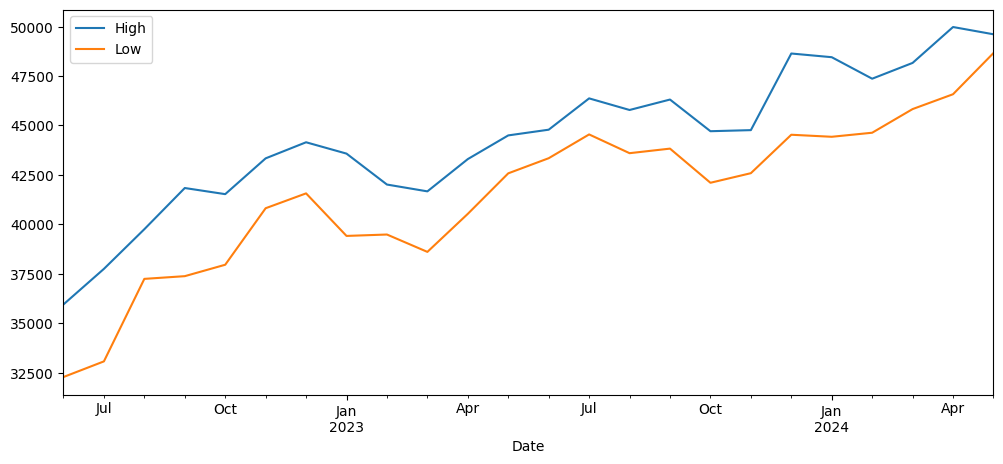

In [31]:
#Visiualizing Data
import matplotlib.pyplot as plt
df['High'].plot(figsize=(12,5))
df['Low'].plot()
plt.legend()
plt.xlabel('Date')

In [43]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF: ",dftest[0])
    print("2. P-Value: ", dftest [1])
    print("3. Num Of Lags: ", dftest [2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest [3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, val)

In [46]:
ad_test(df['High'])

1. ADF:  0.09756190156712743
2. P-Value:  0.965894239036324
3. Num Of Lags:  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 23
5. Critical Values :
	 1% -3.7529275211638033
	 5% -2.998499866852963
	 10% -2.6389669754253307


In [45]:
ad_test(df['Low'])

1. ADF:  2.6618105695391723
2. P-Value:  0.9990840460143352
3. Num Of Lags:  9
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 14
5. Critical Values :
	 1% -4.01203360058309
	 5% -3.1041838775510207
	 10% -2.6909873469387753


In [50]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima (df['High'], trace=True,suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=400.053, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=401.505, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=401.689, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=402.245, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=402.892, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.386 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   24
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -198.026
Date:                Sun, 05 May 2024   AIC                            400.053
Time:                        11:18:33   BIC                            402.324
Sample:                             0   HQIC                           400.624
                                 - 24                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -593.4478    285.669     -2.077      0.038   -1153.348     -33.547
sigma2      1.762e+06   5.83e+05      3.024      0.002     6.2e+05     2.9e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.49
Prob(Q):                              0.90   Prob(JB):                         0.78
Heteroskedasticity (H):               0.64   Skew:                            -0.32
Prob(H) (two-sided):                  0.55   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

In [33]:
# from datetime import datetime
# parsed_dates = [datetime.strptime(date, "%b %Y") for date in dates]

In [34]:
df.head(5)

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2024-05-01,48923.55,49273.90,49607.75,48659.70,222.96M,-0.96%
2024-04-01,49396.75,47391.05,49974.75,46579.05,4.45B,4.82%
2024-03-01,47124.60,46218.00,48161.25,45828.80,3.85B,2.18%
2024-02-01,46120.90,46164.90,47363.40,44633.85,5.33B,0.27%
2024-01-01,45996.80,48203.45,48450.00,44429.00,5.52B,-4.75%


In [ ]:
2024-01-01         43269.03
2024-02-01         43358.99
2024-03-01         43404.75
2024-04-01         43375.58
2024-05-01         43366.07

In [9]:

# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Define and fit the ARIMA model
model = ARIMA(train_data['High'], order=(5, 1, 0))  # Example ARIMA order
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data['High'], predictions)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Forecast future prices
future_dates = pd.date_range(start=df.index[len(test_data)-1], periods=5, freq='MS')
future_predictions = model_fit.forecast(steps=5)
future_predictions = [round(pred, 2) for pred in future_predictions]
# Print forecasted prices
future_forecast = pd.DataFrame(future_predictions, index=future_dates, columns=['High Prediction'])
print(future_forecast)

NameError: name 'df' is not defined

In [8]:
future_forecast.plot(figsize=(12,5))
df['High'].plot()

NameError: name 'future_forecast' is not defined

In [69]:
df['High'].mean()

44346.60833333333

In [58]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   High   No. Observations:                   19
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -153.758
Date:                Sun, 05 May 2024   AIC                            319.517
Time:                        11:32:22   BIC                            324.859
Sample:                             0   HQIC                           320.254
                                 - 19                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0114      0.696      0.016      0.987      -1.353       1.376
ar.L2         -0.0612      0.195     -0.314      0.754      -0.443       0.321
ar.L3         -0.0211      0.354     -0.060      0.952      -0.715       0.672
ar.L4          0.0334      0.417      0.080      0.936      -0.785       0.851
ar.L5          0.0026      0.291      0.009      0.993      -0.567       0.572
sigma2      1.863e+06   9.63e+05      1.934      0.053   -2.47e+04    3.75e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 6.32
Prob(Q):                              0.88   Prob(JB):                         0.04
Heteroskedasticity (H):               0.52   Skew:                            -1.17
Prob(H) (two-sided):                  0.45   Kurtosis:                         4.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:

# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Define and fit the ARIMA model
model = ARIMA(train_data['Low'], order=(5, 1, 0))  # Example ARIMA order
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test_data))

# Evaluate the model
mse = mean_squared_error(test_data['High'], predictions)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Forecast future prices
future_dates = pd.date_range(start='2024-06-01', periods=7, freq='MS')
future_predictions = model_fit.forecast(steps=7)
future_predictions = [round(pred, 2) for pred in future_predictions]

# Print forecasted prices
future_forecast = pd.DataFrame(future_predictions, index=future_dates, columns=['High Prediction'])
print(future_forecast)

Root Mean Squared Error (RMSE): 2623.21
            High Prediction
2024-06-01         40789.48
2024-07-01         40710.28
2024-08-01         40709.18
2024-09-01         40732.73
2024-10-01         40734.29
2024-11-01         40735.12
2024-12-01         40733.72


c:\Users\neelk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  self._init_dates(dates, freq)
c:\Users\neelk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\neelk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  self._init_dates(dates, freq)
c:\Users\neelk\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\U